In [2]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
df = pd.read_csv('../results.csv')
df.shape

(45773, 19)

In [4]:
#features and target selection
features = ['date','starting_ct', 'rank_1', 'rank_2']
target = ['map_winner']
X = df[features]
y = df[target]

In [5]:
#label encoder
#to go back: le.insverse_transform()
le = preprocessing.LabelEncoder()

X.loc[:, 'date'] = le.fit_transform(X['date'])
X.head()

/home/sergio/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,starting_ct,rank_1,rank_2
0,1541,2,62,63
1,1541,2,62,63
2,1541,1,140,118
3,1541,2,61,38
4,1541,2,61,38


In [6]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbrt = GradientBoostingClassifier(max_depth = 5, random_state=0)

In [7]:
gbrt.fit(X_train, y_train)

/home/sergio/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:
print('Train score: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.3f}'.format(gbrt.score(X_test, y_test)))

Train score: 0.651
Test score: 0.631


Features importance: 
[0.12717951 0.00973977 0.48850139 0.37457933]


Text(0, 0.5, 'Feature')

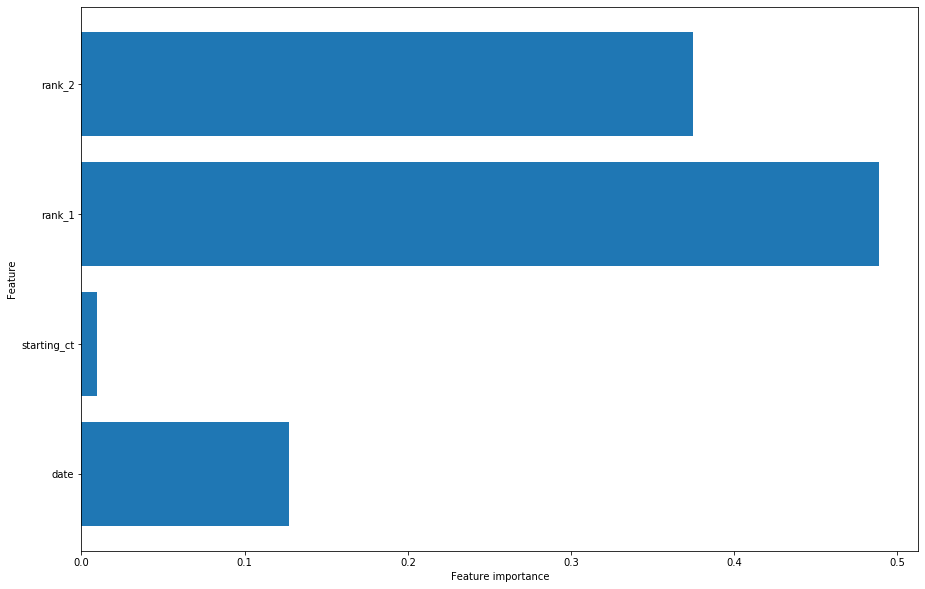

In [9]:
print('Features importance: \n{}'.format(gbrt.feature_importances_))

n_features = len(features)
plt.figure(figsize=(15, 10))
plt.barh(range(n_features), gbrt.feature_importances_, align='center')
plt.yticks(np.arange(n_features), features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [12]:
#probs
pd.DataFrame(gbrt.predict_proba(X_test))

,0,1
0,0.679516,0.320484
1,0.370158,0.629842
2,0.576492,0.423508
3,0.461503,0.538497
4,0.287981,0.712019
...,...,...
11439,0.678801,0.321199
11440,0.484398,0.515602
11441,0.174239,0.825761
11442,0.517647,0.482353
